In [17]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [20]:
main_df = pd.read_csv('drive/MyDrive/ColabNotebooks/UMA/virus_df_full_only_age.csv').drop(['Country', 'Age', 'Health_Status', 'Archaeal', 'Bacteriophage', 'Eukaryotic', 'crassphage'], axis=1)

In [21]:
main_df.head()

Healthy  Ackermannviridae  Adenoviridae  Alphaflexiviridae  Anelloviridae  \
0      1.0               0.0           0.0                0.0           0.00   
1      1.0               0.0           0.0                0.0           0.00   
2      1.0               0.0           0.0                0.0           0.00   
3      1.0               0.0           0.0                0.0           3.84   
4      1.0               0.0           0.0                0.0           0.00   

   Asfarviridae  Astroviridae  Bicaudaviridae  Caliciviridae  Circoviridae  \
0           0.0           0.0             0.0            0.0           0.0   
1           0.0           0.0             0.0            0.0           0.0   
2           0.0           0.0             0.0            0.0           0.0   
3           0.0           0.0             0.0            0.0           0.0   
4           0.0           0.0             0.0            0.0           0.0   

   ...  Poxviridae  Rudiviridae  Siphoviridae  Smacoviridae  Virgaviridae  \
0  ...         0.0          0.0          0.00           0.0           0.0   
1  ...         0.0          0.0          0.00           0.0           0.0   
2  ...         0.0          0.0          0.00           0.0           0.0   
3  ...         0.0          0.0          3.84           0.0           0.0   
4  ...         0.0          0.0          0.00           0.0           0.0   

   Age_Child  Age_Adult  Age_Infant  Age_Elderly  Age_Mix  
0          1          0           0            0        0  
1          1          0           0            0        0  
2          1          0           0            0        0  
3          1          0           0            0        0  
4          1          0           0            0        0  

[5 rows x 34 columns]

In [22]:
main_df.describe()

Healthy  Ackermannviridae  Adenoviridae  Alphaflexiviridae  \
count  1726.000000       1726.000000   1726.000000        1726.000000   
mean      0.775203          0.029048      0.006278           0.000668   
std       0.417570          1.196329      0.092867           0.025832   
min       0.000000          0.000000      0.000000           0.000000   
25%       1.000000          0.000000      0.000000           0.000000   
50%       1.000000          0.000000      0.000000           0.000000   
75%       1.000000          0.000000      0.000000           0.000000   
max       1.000000         49.700000      2.170000           1.070000   

       Anelloviridae  Asfarviridae  Astroviridae  Bicaudaviridae  \
count    1726.000000   1726.000000   1726.000000     1726.000000   
mean        8.403210      0.000293      0.003173        0.000149   
std        68.051975      0.007060      0.059484        0.006210   
min         0.000000      0.000000      0.000000        0.000000   
25%         0.000000      0.000000      0.000000        0.000000   
50%         0.000000      0.000000      0.000000        0.000000   
75%         0.000000      0.000000      0.000000        0.000000   
max      1360.000000      0.191000      1.850000        0.258000   

       Caliciviridae  Circoviridae  ...  Poxviridae  Rudiviridae  \
count    1726.000000   1726.000000  ...  1726.00000  1726.000000   
mean        0.001624      1.726415  ...     0.00117     0.000342   
std         0.039424     17.480390  ...     0.02644     0.010040   
min         0.000000      0.000000  ...     0.00000     0.000000   
25%         0.000000      0.000000  ...     0.00000     0.000000   
50%         0.000000      0.000000  ...     0.00000     0.000000   
75%         0.000000      0.000000  ...     0.00000     0.000000   
max         1.120000    374.000000  ...     0.73000     0.299000   

       Siphoviridae  Smacoviridae  Virgaviridae    Age_Child    Age_Adult  \
count   1726.000000   1726.000000   1726.000000  1726.000000  1726.000000   
mean       9.854892      0.019177      0.015506     0.077636     0.796640   
std       25.667968      0.756887      0.280110     0.267676     0.402615   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        1.570000      0.000000      0.000000     0.000000     1.000000   
50%        4.890000      0.000000      0.000000     0.000000     1.000000   
75%        8.750000      0.000000      0.000000     0.000000     1.000000   
max      393.000000     31.400000      7.700000     1.000000     1.000000   

        Age_Infant  Age_Elderly      Age_Mix  
count  1726.000000  1726.000000  1726.000000  
mean      0.050985     0.038239     0.036501  
std       0.220031     0.191828     0.187586  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 34 columns]

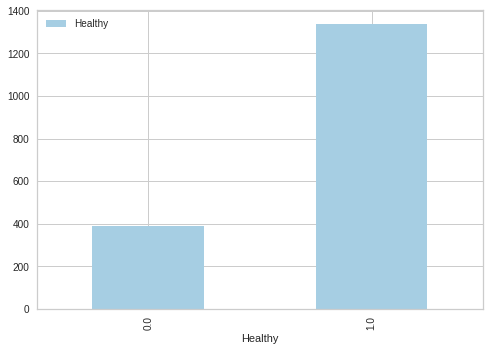

In [23]:
main_df.groupby(['Healthy'])[['Healthy']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(main_df))))

In [24]:
virus_ml_df = main_df.copy()
virus_ml_df.head()

Healthy  Ackermannviridae  Adenoviridae  Alphaflexiviridae  Anelloviridae  \
0      1.0               0.0           0.0                0.0           0.00   
1      1.0               0.0           0.0                0.0           0.00   
2      1.0               0.0           0.0                0.0           0.00   
3      1.0               0.0           0.0                0.0           3.84   
4      1.0               0.0           0.0                0.0           0.00   

   Asfarviridae  Astroviridae  Bicaudaviridae  Caliciviridae  Circoviridae  \
0           0.0           0.0             0.0            0.0           0.0   
1           0.0           0.0             0.0            0.0           0.0   
2           0.0           0.0             0.0            0.0           0.0   
3           0.0           0.0             0.0            0.0           0.0   
4           0.0           0.0             0.0            0.0           0.0   

   ...  Poxviridae  Rudiviridae  Siphoviridae  Smacoviridae  Virgaviridae  \
0  ...         0.0          0.0          0.00           0.0           0.0   
1  ...         0.0          0.0          0.00           0.0           0.0   
2  ...         0.0          0.0          0.00           0.0           0.0   
3  ...         0.0          0.0          3.84           0.0           0.0   
4  ...         0.0          0.0          0.00           0.0           0.0   

   Age_Child  Age_Adult  Age_Infant  Age_Elderly  Age_Mix  
0          1          0           0            0        0  
1          1          0           0            0        0  
2          1          0           0            0        0  
3          1          0           0            0        0  
4          1          0           0            0        0  

[5 rows x 34 columns]

In [25]:
target = 'Healthy'

X = virus_ml_df.loc[:,virus_ml_df.columns!=target]
y = virus_ml_df.loc[:,virus_ml_df.columns==target]

In [26]:
oversample = SMOTE(random_state=42, k_neighbors=20)
X, y = oversample.fit_resample(X, y)

In [27]:
virus_ml_df = pd.concat([X, y], axis=1)

In [28]:
virus_ml_df.head()

Ackermannviridae  Adenoviridae  Alphaflexiviridae  Anelloviridae  \
0               0.0           0.0                0.0           0.00   
1               0.0           0.0                0.0           0.00   
2               0.0           0.0                0.0           0.00   
3               0.0           0.0                0.0           3.84   
4               0.0           0.0                0.0           0.00   

   Asfarviridae  Astroviridae  Bicaudaviridae  Caliciviridae  Circoviridae  \
0           0.0           0.0             0.0            0.0           0.0   
1           0.0           0.0             0.0            0.0           0.0   
2           0.0           0.0             0.0            0.0           0.0   
3           0.0           0.0             0.0            0.0           0.0   
4           0.0           0.0             0.0            0.0           0.0   

   Cruliviridae  ...  Rudiviridae  Siphoviridae  Smacoviridae  Virgaviridae  \
0           0.0  ...          0.0          0.00           0.0           0.0   
1           0.0  ...          0.0          0.00           0.0           0.0   
2           0.0  ...          0.0          0.00           0.0           0.0   
3           0.0  ...          0.0          3.84           0.0           0.0   
4           0.0  ...          0.0          0.00           0.0           0.0   

   Age_Child  Age_Adult  Age_Infant  Age_Elderly  Age_Mix  Healthy  
0          1          0           0            0        0      1.0  
1          1          0           0            0        0      1.0  
2          1          0           0            0        0      1.0  
3          1          0           0            0        0      1.0  
4          1          0           0            0        0      1.0  

[5 rows x 34 columns]

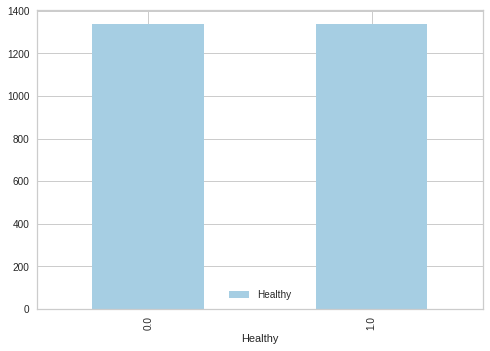

In [29]:
virus_ml_df.groupby(['Healthy'])[['Healthy']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(virus_ml_df))))

In [30]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [31]:
from pycaret.utils import version
version()

'2.3.10'

In [32]:
from pycaret.classification import *

In [33]:
exp_clf101 = setup(data = virus_ml_df, target = 'Healthy', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target           Healthy
2                              Target Type            Binary
3                            Label Encoded    0.0: 0, 1.0: 1
4                            Original Data        (2676, 34)
5                           Missing Values             False
6                         Numeric Features                26
7                     Categorical Features                 7
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (1873, 32)
12                    Transformed Test Set         (803, 32)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              41fa
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Healthy',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [34]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.8388  0.9211  0.8118  0.8630   
rf               Random Forest Classifier    0.8174  0.9061  0.7844  0.8450   
lightgbm  Light Gradient Boosting Machine    0.8153  0.8989  0.8002  0.8317   
gbc          Gradient Boosting Classifier    0.7955  0.8717  0.7718  0.8166   
dt               Decision Tree Classifier    0.7571  0.7630  0.7445  0.7702   
knn                K Neighbors Classifier    0.7304  0.8057  0.6362  0.7930   
ada                  Ada Boost Classifier    0.7293  0.8077  0.7360  0.7334   
lr                    Logistic Regression    0.6658  0.7413  0.6320  0.6865   
ridge                    Ridge Classifier    0.6642  0.0000  0.6823  0.6686   
lda          Linear Discriminant Analysis    0.6610  0.7315  0.6676  0.6701   
svm                   SVM - Linear Kernel    0.6219  0.0000  0.5965  0.6385   
qda       Quadratic Discriminant Analysis    0.5371  0.6686  0.0989  0.9133   
nb                            Naive Bayes    0.5328  0.6097  0.1178  0.7662   
dummy                    Dummy Classifier    0.5077  0.5000  1.0000  0.5077   

              F1   Kappa     MCC  TT (Sec)  
et        0.8361  0.6778  0.6798     0.490  
rf        0.8129  0.6352  0.6376     0.316  
lightgbm  0.8139  0.6307  0.6335     0.184  
gbc       0.7926  0.5913  0.5934     0.507  
dt        0.7564  0.5143  0.5155     0.021  
knn       0.7054  0.4623  0.4723     0.047  
ada       0.7338  0.4584  0.4596     0.154  
lr        0.6565  0.3322  0.3347     1.190  
ridge     0.6682  0.3277  0.3336     0.015  
lda       0.6604  0.3215  0.3278     0.035  
svm       0.6075  0.2448  0.2506     0.016  
qda       0.1770  0.0868  0.1923     0.017  
nb        0.2023  0.0777  0.1463     0.014  
dummy     0.6735  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [35]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [36]:
evaluate_model(best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

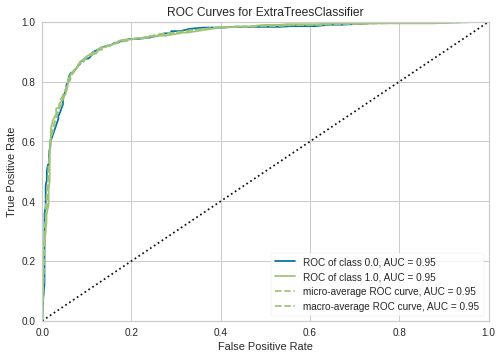

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(best_model, plot = 'auc')

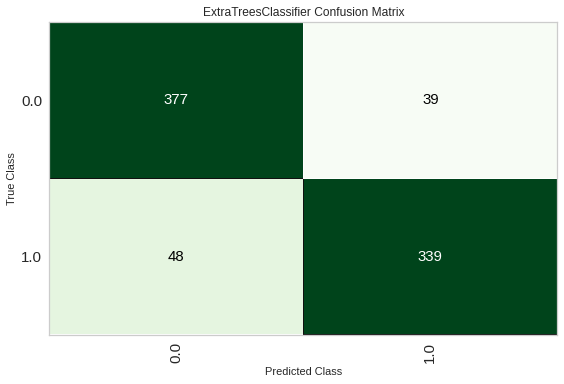

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(best_model, plot = 'confusion_matrix')

In [39]:
predict_model(best_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.8917  0.9498   0.876  0.8968  0.8863  0.7829   

      MCC  
0  0.7831

Adenoviridae  Alphaflexiviridae  Anelloviridae  Asfarviridae  \
0             0.0                0.0            0.0           0.0   
1             0.0                0.0            0.0           0.0   
2             0.0                0.0            0.0           0.0   
3             0.0                0.0            0.0           0.0   
4             0.0                0.0            0.0           0.0   
..            ...                ...            ...           ...   
798           0.0                0.0            0.0           0.0   
799           0.0                0.0            0.0           0.0   
800           0.0                0.0            0.0           0.0   
801           0.0                0.0            0.0           0.0   
802           0.0                0.0            0.0           0.0   

     Astroviridae  Bicaudaviridae  Caliciviridae  Circoviridae  Cruliviridae  \
0             0.0             0.0            0.0           0.0           0.0   
1             0.0             0.0            0.0           0.0           0.0   
2             0.0             0.0            0.0           0.0           0.0   
3             0.0             0.0            0.0           0.0           0.0   
4             0.0             0.0            0.0           0.0           0.0   
..            ...             ...            ...           ...           ...   
798           0.0             0.0            0.0           0.0           0.0   
799           0.0             0.0            0.0           0.0           0.0   
800           0.0             0.0            0.0           0.0           0.0   
801           0.0             0.0            0.0           0.0           0.0   
802           0.0             0.0            0.0           0.0           0.0   

     Geminiviridae  ...  Ackermannviridae_0.0  Smacoviridae_0.0  Age_Child_0  \
0              0.0  ...                   1.0               1.0          1.0   
1              0.0  ...                   1.0               1.0          1.0   
2              0.0  ...                   1.0               1.0          1.0   
3              0.0  ...                   1.0               1.0          1.0   
4              0.0  ...                   1.0               1.0          1.0   
..             ...  ...                   ...               ...          ...   
798            0.0  ...                   1.0               1.0          1.0   
799            0.0  ...                   1.0               1.0          1.0   
800            0.0  ...                   1.0               1.0          1.0   
801            0.0  ...                   1.0               1.0          1.0   
802            0.0  ...                   1.0               1.0          1.0   

     Age_Adult_0  Age_Infant_0  Age_Elderly_0  Age_Mix_1  Healthy  Label  \
0            0.0           1.0            1.0        0.0      0.0    0.0   
1            1.0           1.0            1.0        0.0      0.0    0.0   
2            0.0           1.0            1.0        0.0      0.0    0.0   
3            0.0           1.0            1.0        0.0      1.0    1.0   
4            1.0           1.0            0.0        0.0      0.0    0.0   
..           ...           ...            ...        ...      ...    ...   
798          0.0           1.0            1.0        0.0      0.0    0.0   
799          0.0           1.0            1.0        0.0      0.0    0.0   
800          0.0           1.0            1.0        0.0      0.0    1.0   
801          0.0           1.0            1.0        0.0      0.0    0.0   
802          0.0           1.0            1.0        0.0      0.0    0.0   

      Score  
0    0.7900  
1    1.0000  
2    0.7679  
3    0.9700  
4    1.0000  
..      ...  
798  0.7600  
799  0.9600  
800  0.5400  
801  0.7300  
802  0.6900  

[803 rows x 35 columns]

In [40]:
predictions = predict_model(best_model, data=main_df)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Extra Trees Classifier    0.9467  0.9868  0.9544  0.9763  0.9652  0.8511   

      MCC  
0  0.8522

Healthy  Ackermannviridae  Adenoviridae  Alphaflexiviridae  Anelloviridae  \
0      1.0               0.0           0.0                0.0           0.00   
1      1.0               0.0           0.0                0.0           0.00   
2      1.0               0.0           0.0                0.0           0.00   
3      1.0               0.0           0.0                0.0           3.84   
4      1.0               0.0           0.0                0.0           0.00   

   Asfarviridae  Astroviridae  Bicaudaviridae  Caliciviridae  Circoviridae  \
0           0.0           0.0             0.0            0.0           0.0   
1           0.0           0.0             0.0            0.0           0.0   
2           0.0           0.0             0.0            0.0           0.0   
3           0.0           0.0             0.0            0.0           0.0   
4           0.0           0.0             0.0            0.0           0.0   

   ...  Siphoviridae  Smacoviridae  Virgaviridae  Age_Child  Age_Adult  \
0  ...          0.00           0.0           0.0          1          0   
1  ...          0.00           0.0           0.0          1          0   
2  ...          0.00           0.0           0.0          1          0   
3  ...          3.84           0.0           0.0          1          0   
4  ...          0.00           0.0           0.0          1          0   

   Age_Infant  Age_Elderly  Age_Mix  Label  Score  
0           0            0        0    1.0   0.52  
1           0            0        0    1.0   0.52  
2           0            0        0    1.0   1.00  
3           0            0        0    1.0   1.00  
4           0            0        0    1.0   0.52  

[5 rows x 36 columns]

In [41]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8670  0.9278  0.8125  0.9176  0.8619  0.7346  0.7396
1       0.7926  0.9196  0.7474  0.8256  0.7845  0.5855  0.5882
2       0.8032  0.8878  0.7684  0.8295  0.7978  0.6067  0.6083
3       0.8449  0.9002  0.8632  0.8367  0.8497  0.6896  0.6900
4       0.8770  0.9400  0.8737  0.8830  0.8783  0.7540  0.7540
5       0.8503  0.9433  0.8000  0.8941  0.8444  0.7010  0.7050
6       0.8503  0.9336  0.8105  0.8851  0.8462  0.7009  0.7034
7       0.8449  0.9428  0.8211  0.8667  0.8432  0.6900  0.6910
8       0.8503  0.9047  0.8526  0.8526  0.8526  0.7005  0.7005
9       0.8075  0.9116  0.7684  0.8391  0.8022  0.6154  0.6177
Mean    0.8388  0.9211  0.8118  0.8630  0.8361  0.6778  0.6798
Std     0.0267  0.0185  0.0403  0.0296  0.0290  0.0533  0.0532

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


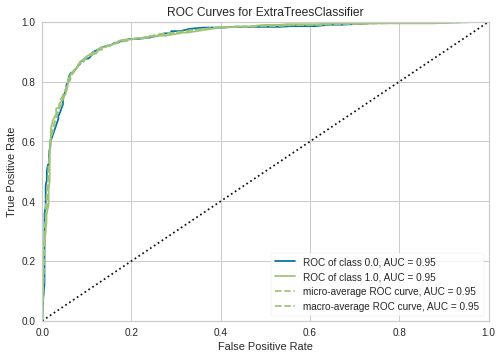

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(et, plot = 'auc')

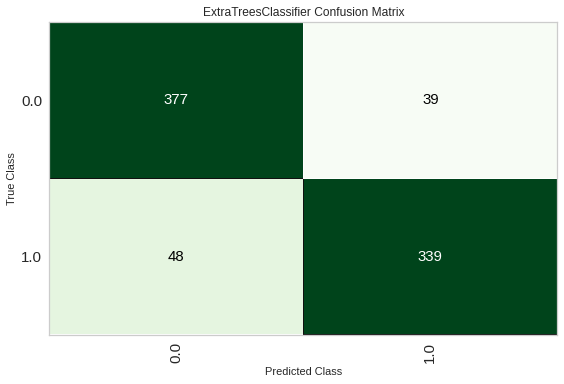

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [43]:
plot_model(et, plot = 'confusion_matrix')

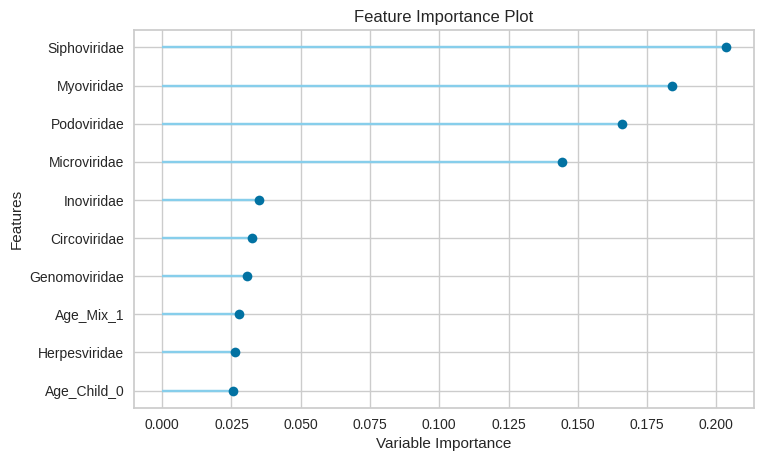

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
plot_model(et, plot = 'feature')

In [45]:
lgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8298  0.9034  0.8125  0.8478  0.8298  0.6597  0.6603
1       0.8138  0.8972  0.7579  0.8571  0.8045  0.6281  0.6324
2       0.7500  0.8438  0.6737  0.8000  0.7314  0.5008  0.5073
3       0.8021  0.8792  0.8632  0.7736  0.8159  0.6034  0.6077
4       0.8717  0.9404  0.8842  0.8660  0.8750  0.7432  0.7433
5       0.8342  0.9238  0.8000  0.8636  0.8306  0.6688  0.6706
6       0.8663  0.9354  0.8421  0.8889  0.8649  0.7328  0.7338
7       0.7914  0.8907  0.8105  0.7857  0.7979  0.5826  0.5829
8       0.8021  0.8938  0.8421  0.7843  0.8122  0.6037  0.6054
9       0.7914  0.8816  0.7158  0.8500  0.7771  0.5839  0.5915
Mean    0.8153  0.8989  0.8002  0.8317  0.8139  0.6307  0.6335
Std     0.0348  0.0274  0.0630  0.0393  0.0392  0.0694  0.0678

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


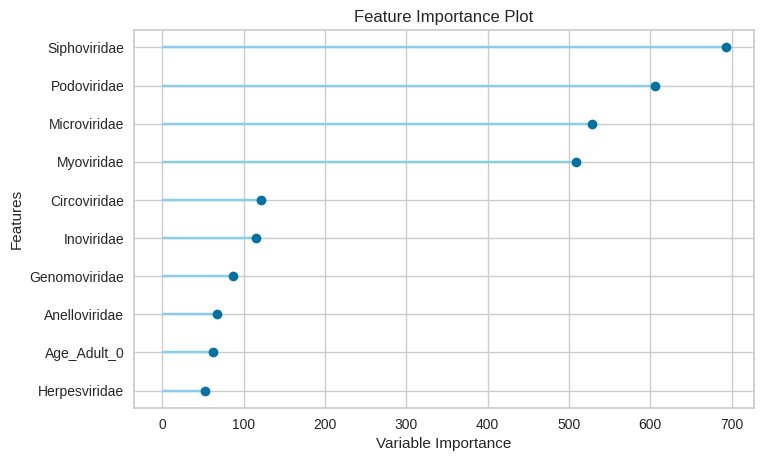

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(lgbm, plot = 'feature')

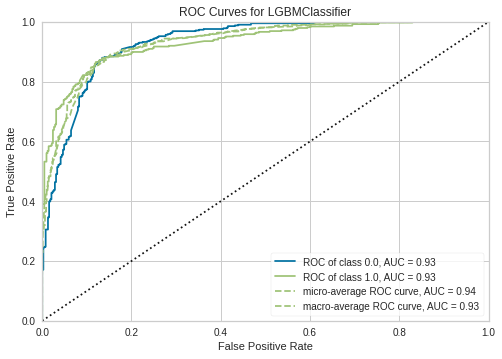

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(lgbm, plot = 'auc')

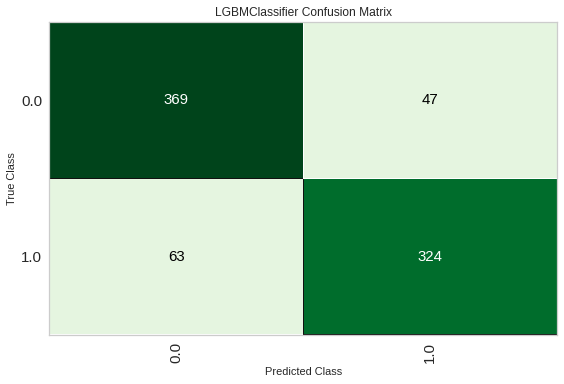

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(lgbm, plot = 'confusion_matrix')

In [49]:
import lightgbm as lgb

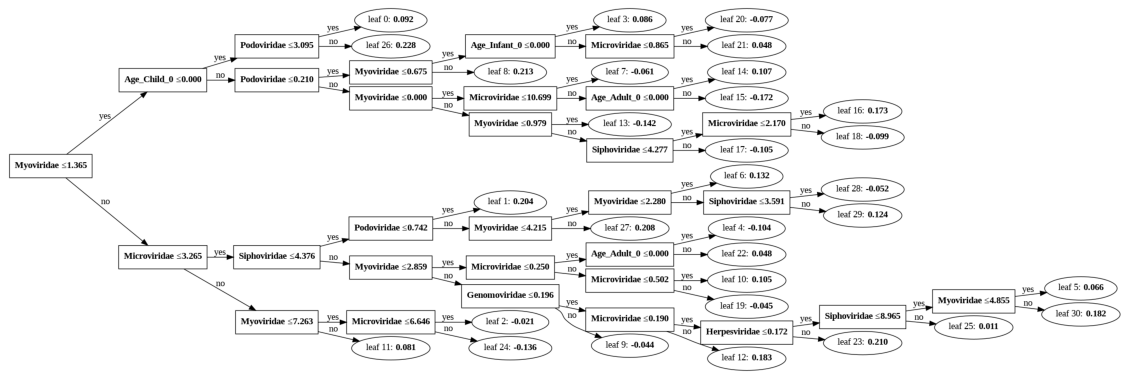

In [50]:
lgb.plot_tree(lgbm,figsize=(20,30))

In [51]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8564  0.9127  0.8333  0.8791  0.8556  0.7130  0.7140
1       0.7979  0.8999  0.7368  0.8434  0.7865  0.5962  0.6012
2       0.7553  0.8601  0.6842  0.8025  0.7386  0.5114  0.5171
3       0.8075  0.8766  0.8105  0.8105  0.8105  0.6149  0.6149
4       0.8503  0.9355  0.8316  0.8681  0.8495  0.7007  0.7013
5       0.8503  0.9472  0.8211  0.8764  0.8478  0.7008  0.7022
6       0.8663  0.9360  0.8211  0.9070  0.8619  0.7330  0.7364
7       0.8075  0.9052  0.7789  0.8315  0.8043  0.6153  0.6165
8       0.8075  0.8914  0.8211  0.8041  0.8125  0.6147  0.6149
9       0.7754  0.8969  0.7053  0.8272  0.7614  0.5518  0.5580
Mean    0.8174  0.9061  0.7844  0.8450  0.8129  0.6352  0.6376
Std     0.0352  0.0261  0.0528  0.0342  0.0397  0.0702  0.0689

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [52]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


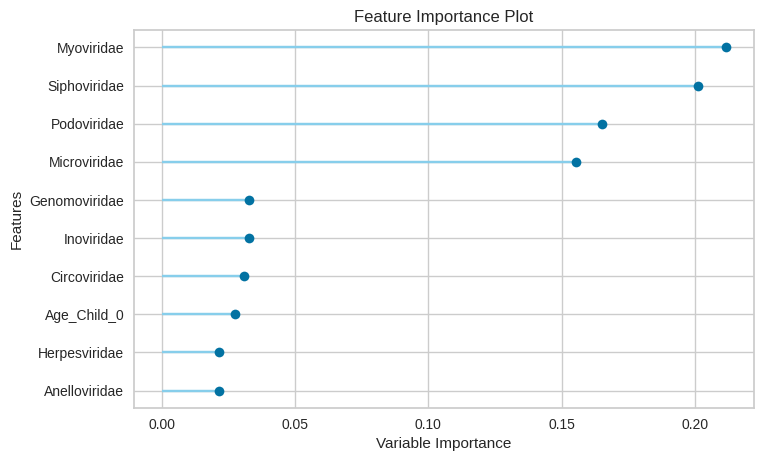

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
plot_model(rf, plot = 'feature')

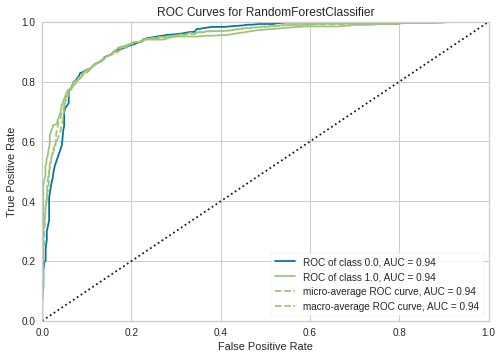

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
plot_model(rf, plot = 'auc')

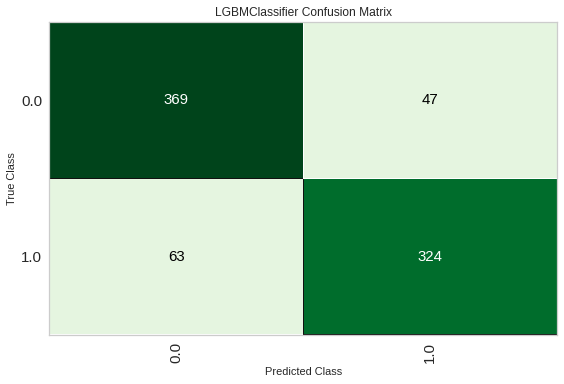

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [55]:
plot_model(lgbm, plot = 'confusion_matrix')